In [127]:
import os
import open3d as o3d
import numpy as np
from dataset.utils import readPointCloud
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [156]:
def preprocess(points):
    actual = points[:,:3]
    actual[:,0] = points[:,0].astype('int32')
    actual[:,1] = points[:,1].astype('int32')
    actual[:,0] -= np.min(actual[:,0])
    actual[:,1] -= np.min(actual[:,1])
    return actual

For single scans

100%|██████████| 77/77 [08:26<00:00,  6.57s/it]


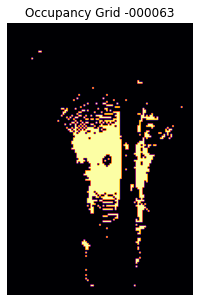

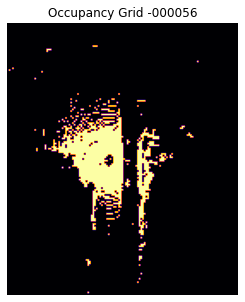

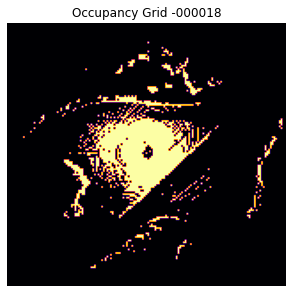

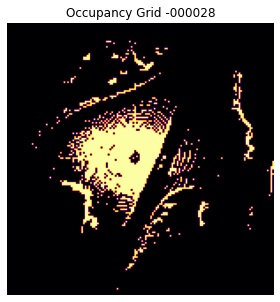

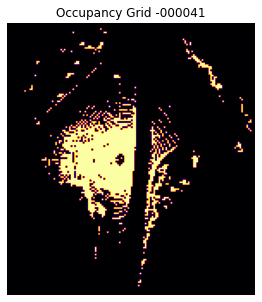

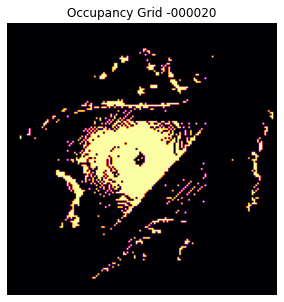

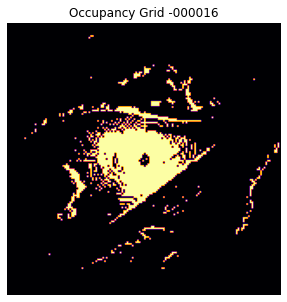

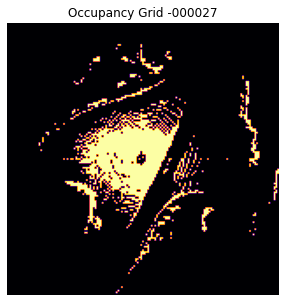

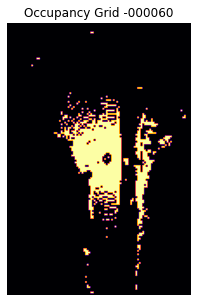

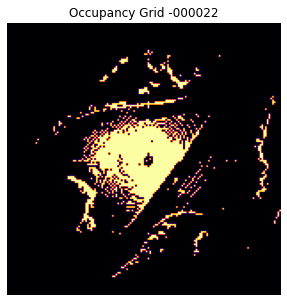

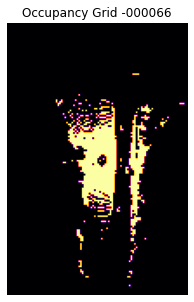

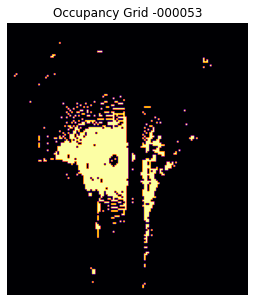

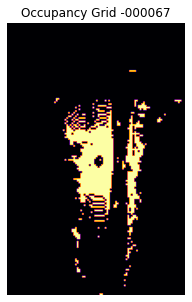

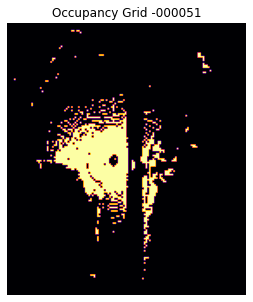

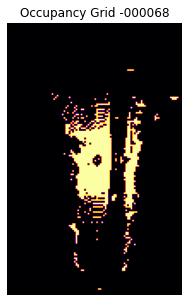

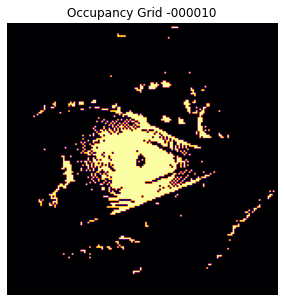

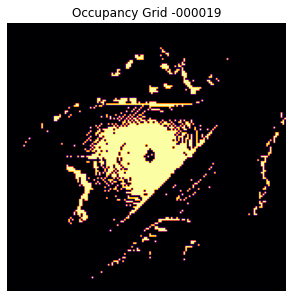

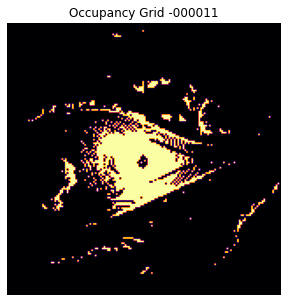

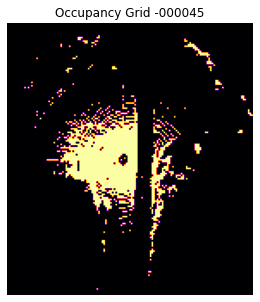

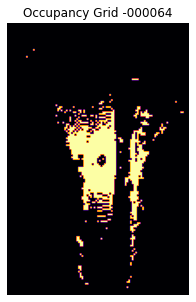

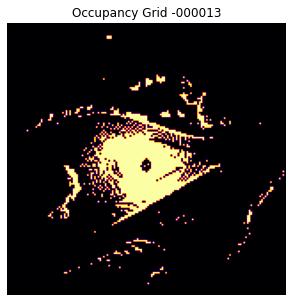

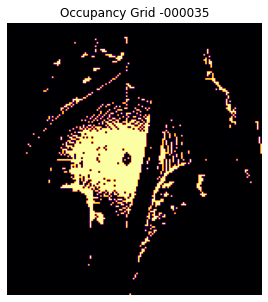

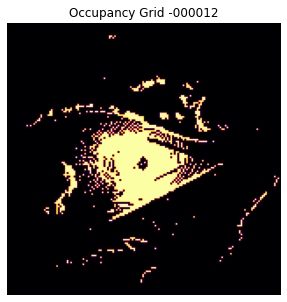

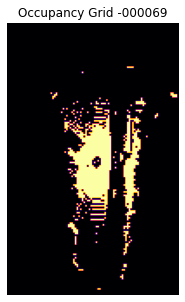

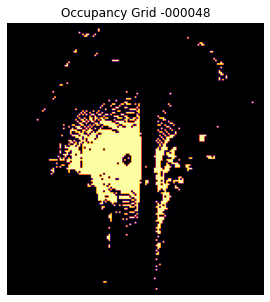

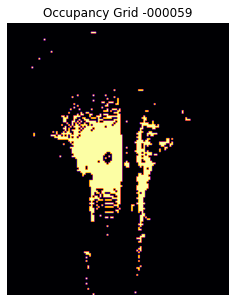

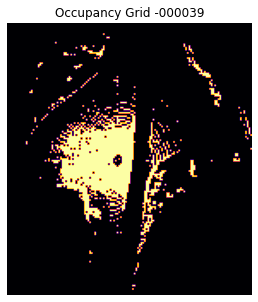

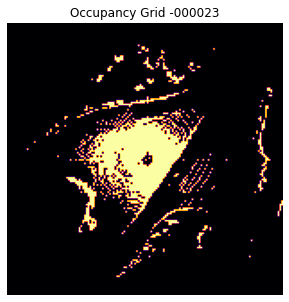

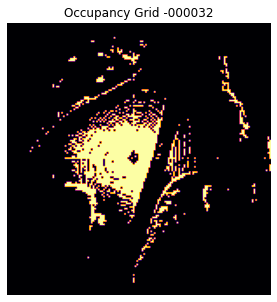

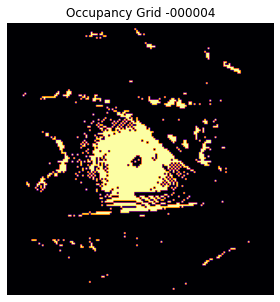

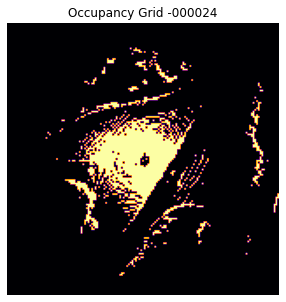

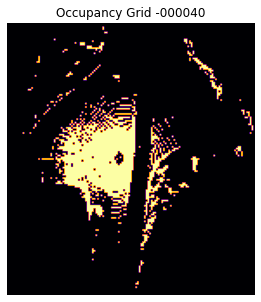

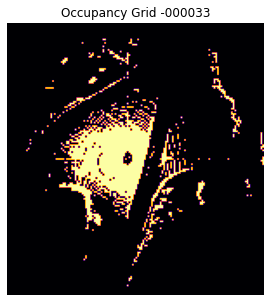

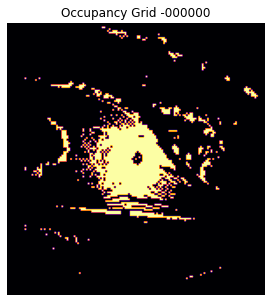

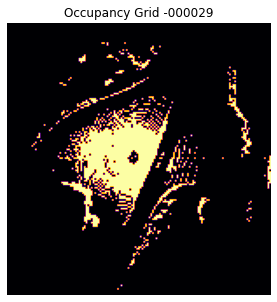

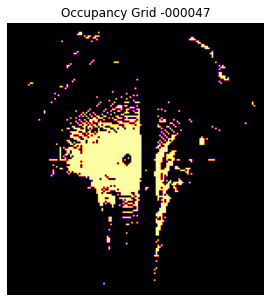

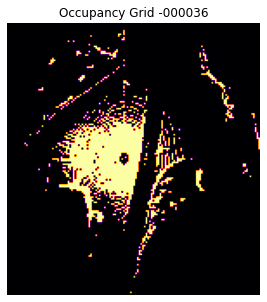

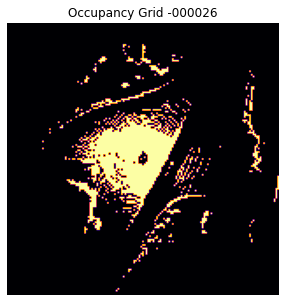

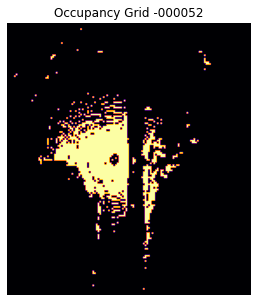

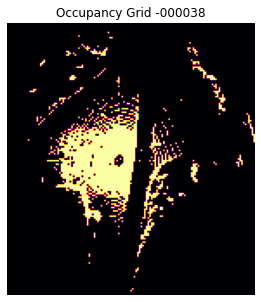

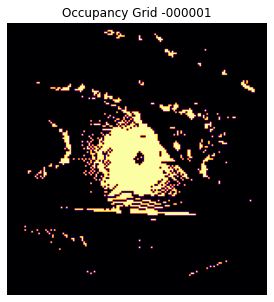

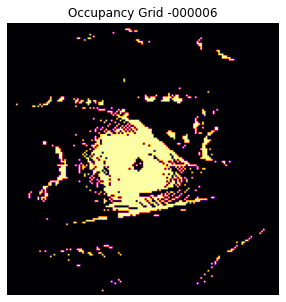

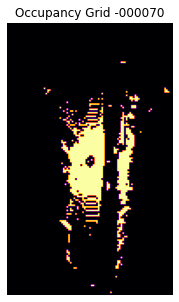

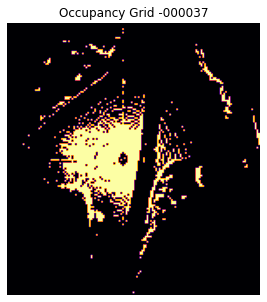

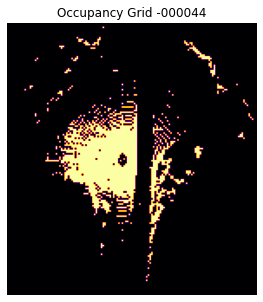

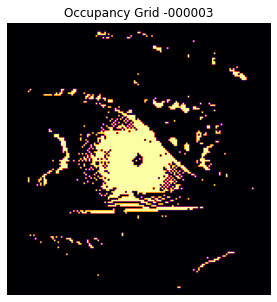

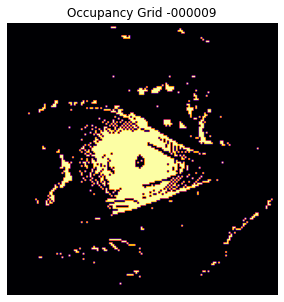

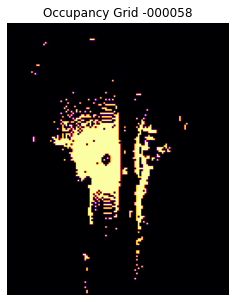

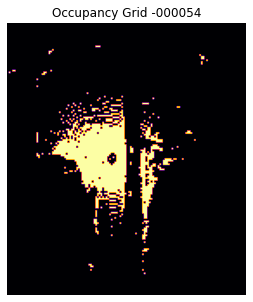

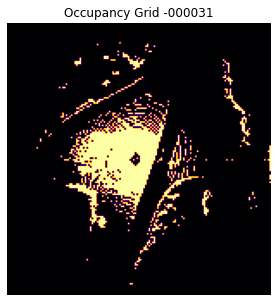

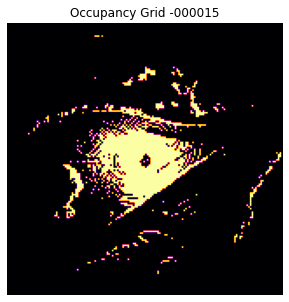

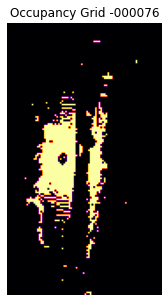

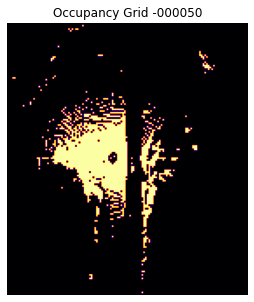

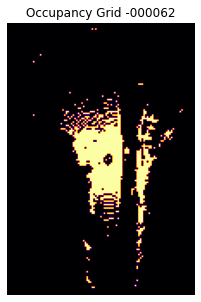

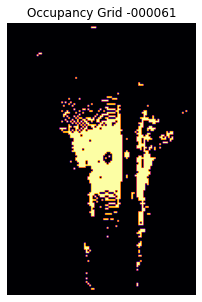

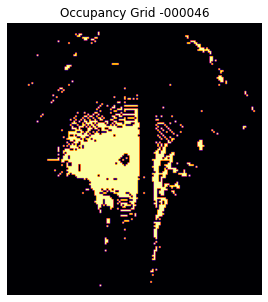

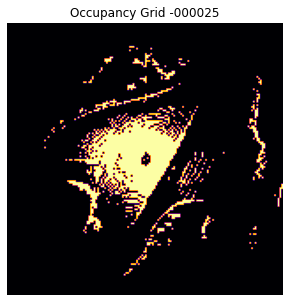

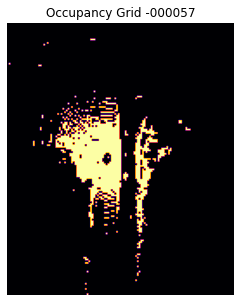

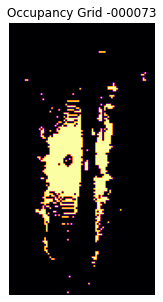

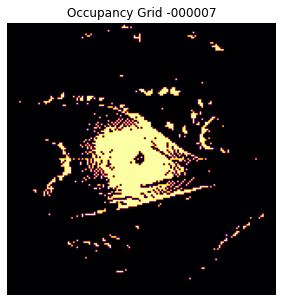

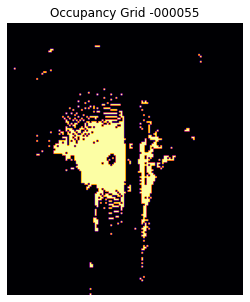

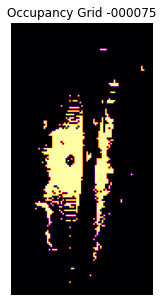

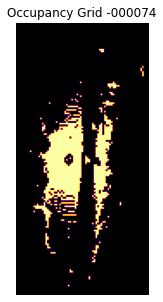

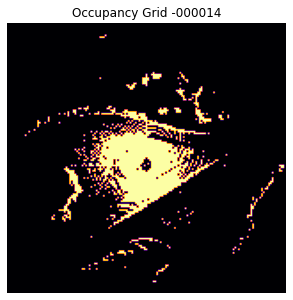

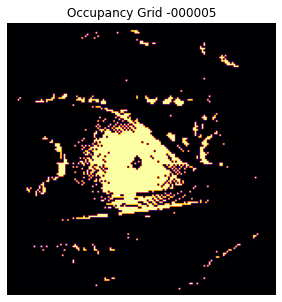

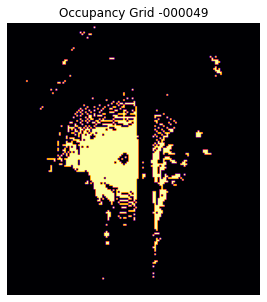

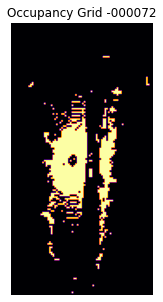

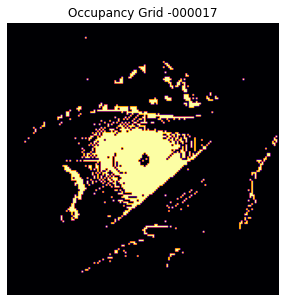

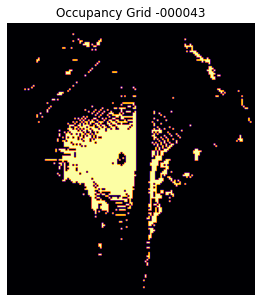

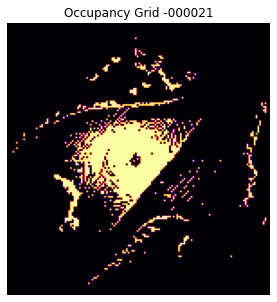

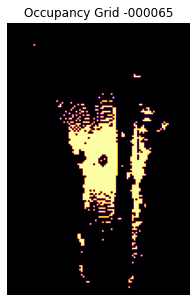

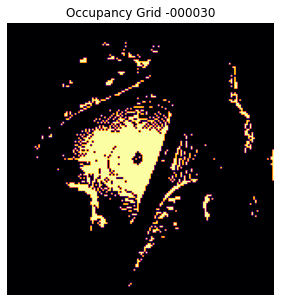

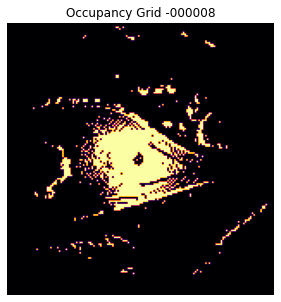

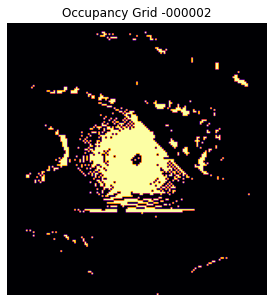

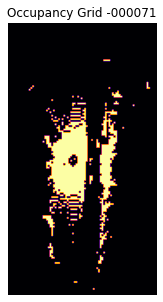

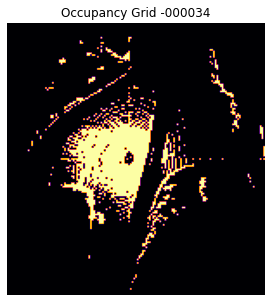

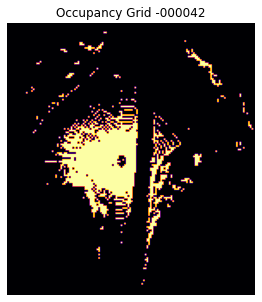

In [129]:
path = 'dataset/01/'
for file in tqdm(sorted(os.listdir(path))):
    p1 = readPointCloud(path+file)
    name = file.split('.')[0]
    actual = preprocess(p1)
    shapex = int(np.max(actual[:,0]))
    shapey = int(np.max(actual[:,1]))

    image = np.zeros((shapex,shapey))
    threshold = 10
    for i in range(shapex):
        for j in range(shapey):
            result = actual[np.all([actual[:,0]==i,actual[:,1]==j],axis=0)].shape
            if result[0] >= threshold:
                image[i,j] = 1

    plt.figure(figsize=(5,5))
    plt.axis('off')
    plt.title('Occupancy Grid -' + name)
    plt.imshow(image,cmap='inferno')
    plt.savefig('results/result_'+name+'.png')
    plt.clf()

In [145]:
bins = []
for x in sorted(os.listdir(path)):
    bins.append(x)

(245490, 4)

For multiple scans

In [159]:
for i in tqdm(range(0,len(bins[:-10]),10)):
    pk =[readPointCloud(path+file) for file in bins[i:i+10]]
    p1 = np.vstack(pk)
    actual = preprocess(p1)
    shapex = int(np.max(actual[:,0]))
    shapey = int(np.max(actual[:,1]))
    name = str(i)+'_'+str(i+10)
    image = np.zeros((shapex,shapey))
    threshold = 10
    for i in range(shapex):
        for j in range(shapey):
            result = actual[np.all([actual[:,0]==i,actual[:,1]==j],axis=0)].shape
            if result[0] >= threshold:
                image[i,j] = 1
    plt.figure(figsize=(5,5))
    plt.axis('off')
    plt.title('Occupancy Grid -' + name)
    plt.imshow(image,cmap='inferno')
    plt.savefig('result_10/result_'+name+'.png')
    plt.clf()

100%|██████████| 7/7 [12:00<00:00, 102.91s/it]


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>